In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset_LR 
dataset_LR = pd.read_csv("Salary_Data.csv")
X = dataset_LR.iloc[:,: -1].values
y = dataset_LR.iloc[:, 1].values

# Splitting the dataset_LR into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

### Linear Regression

In [3]:

# Fitting the Simple Linear Regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

# Predicting the test set results
y_pred = regressor.predict(X_test)

Text(0, 0.5, 'Salary')

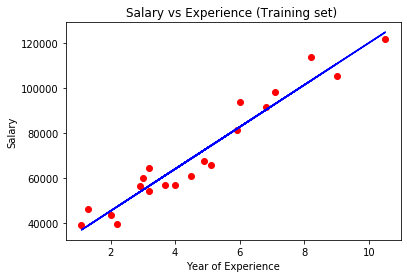

In [4]:
# Visualising the training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue') 
plt.title("Salary vs Experience (Training set) ")
plt.xlabel("Year of Experience")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

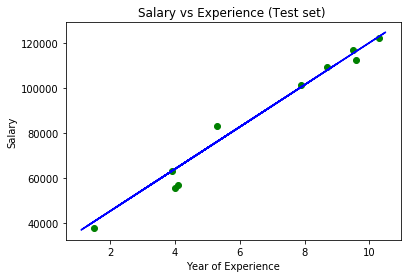

In [5]:
# Visualising the test set results
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'blue') 
plt.title("Salary vs Experience (Test set) ")
plt.xlabel("Year of Experience")
plt.ylabel("Salary")

### Multiple Linear Regression 



In [6]:

#Import ing the dataset_MLR
dataset_MLR = pd.read_csv("50_Startups.csv")
X = dataset_MLR.iloc[:,: -1].values
y = dataset_MLR.iloc[:, 4].values

# Avodint the dummy variable Trap
X = X[:, 1:]

# Encoding the categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelendocer_X = LabelEncoder()
X[:, 3] = labelendocer_X.fit_transform(X[:, 3])
onehotencder = OneHotEncoder(categorical_features=[3])
X = onehotencder.fit_transform(X).toarray()

# Splitting the dataset_LR into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Multiple Linear Regression to Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

# Prediction of the Test set results 
y_pred = regressor.predict(X_test)

IndexError: index 3 is out of bounds for axis 1 with size 3

In [7]:
# Bulding and optimal model using Backward Elimination
import statsmodels.api as smf
X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)
X_opt =  X[:, [0,1,2,3,4,5]]
regressor_OLS = smf.OLS(y,X_opt).fit() # OLS - Ordinary Least Square
regressor_OLS.summary()  
X_opt =  X[:, [0,1,3,4,5]]
regressor_OLS = smf.OLS(y,X_opt).fit() # OLS - Ordinary Least Square
regressor_OLS.summary() 
X_opt =  X[:, [0,3,4,5]]
regressor_OLS = smf.OLS(y,X_opt).fit() # OLS - Ordinary Least Square
regressor_OLS.summary() 
X_opt =  X[:, [0,3,5]]
regressor_OLS = smf.OLS(y,X_opt).fit() # OLS - Ordinary Least Square
regressor_OLS.summary() 
X_opt =  X[:, [0,3]]
regressor_OLS = smf.OLS(y,X_opt).fit() # OLS - Ordinary Least Square
regressor_OLS.summary() 

IndexError: index 4 is out of bounds for axis 1 with size 4

In [8]:
# Polinomial Linear Regression

# Importing the dataset_PLR 
dataset_PLR = pd.read_csv("Position_Salaries.csv")
X = dataset_PLR.iloc[:,1:2].values # We use [:,1:2] instead of [:,1] so that we can have the X as the matrix all the time in the regresson model
y = dataset_PLR.iloc[:,2].values

# Fitting the Linear Regression to the dataset 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

# Fitting the Polynomial Linear Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)  # degree imporoves the accurace in this example
X_poly = poly_reg.fit_transform(X)
lin_reg2  = LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Salary')

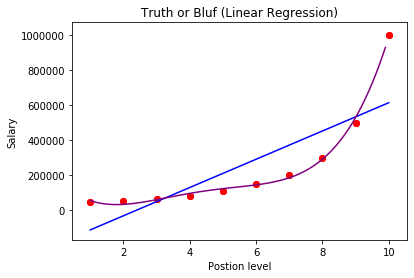

In [9]:
# Visualising the Linear Regression results
plt.scatter(X, y, color='red')
plt.plot(X,lin_reg.predict(X), color='blue')
plt.title("Truth or Bluf (Linear Regression)")
plt.xlabel("Postion level")
plt.ylabel("Salary")

# Visualising the Polynomial Regression results
X_grid = np.arange(min(X), max(X), 0.1)   # Sacling the X-axis of the plot from 10 to 5 untis 
X_grid = X_grid.reshape(len(X_grid),1)    # Scaling to make smoother curve   
plt.scatter(X, y, color='red')
plt.plot(X_grid,lin_reg2.predict(poly_reg.fit_transform(X_grid)), color='purple')
plt.title("Truth or Bluf (Linear Regression)")
plt.xlabel("Postion level")
plt.ylabel("Salary")



In [10]:
# Predicting a new results with Linear Regression
lin_reg.predict([[6.5]]) # You can pass any value insted of X for e.g:[[6.5]] as X is taken as matrix at the starting

# Predicting a new results with Polynomial Regression
lin_reg2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265153])

/Users/pymacbit/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Salary')

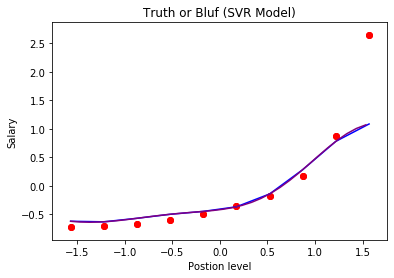

In [11]:
# Support Vector Regression

# Importing the dataset_SVR
dataset_SVR = pd.read_csv("Position_Salaries.csv")
X = dataset_SVR.iloc[:,1:2].values
y = dataset_SVR.iloc[:, 2].values

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1, 1))

# Fitting the Support Vector Regression to the training set
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

# Predicting the SVR results
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))

# Visualising the SVR results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')  
plt.xlabel("Postion level")
plt.ylabel("Salary")
 
# Visualising the SVR results (For highrt resolution and smoother curve) 
X_grid = np.arange(min(X), max(X), 0.1)   # Sacling the X-axis of the plot from 10 to 5 untis 
X_grid = X_grid.reshape(len(X_grid),1)    # Scaling to make smoother curve   
plt.scatter(X, y, color='red')
plt.plot(X_grid,regressor.predict(X_grid), color='purple')
plt.title("Truth or Bluf (SVR Model)")
plt.xlabel("Postion level")
plt.ylabel("Salary")



Text(0, 0.5, 'Salary')

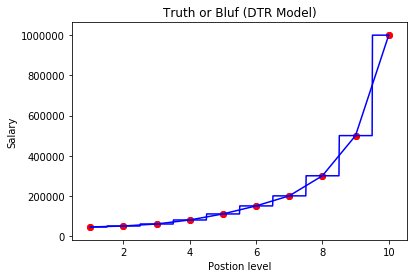

In [12]:
# Decision Tree Regression

# Importing the dataset_DTR
dataset_DTR = pd.read_csv("Position_Salaries.csv")
X = dataset_DTR.iloc[:,1:2].values
y = dataset_DTR.iloc[:, 2].values

# Fitting the Desicion Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

# Predicting the DTR results
y_pred = regressor.predict([[6.5]])

# Visualising the DTR results
plt.scatter(X, y, color = 'red') 
plt.plot(X, regressor.predict(X), color = 'blue') 
plt.title("Truth or Bluf(Decsion Tree Regression) ")
plt.xlabel("Postion level")
plt.ylabel("Salary")

# Visualising the DTR results (For highrt resolution and smoother curve) 
X_grid = np.arange(min(X), max(X), 0.01)   # Sacling the X-axis of the plot from 10 to 5 untis 
X_grid = X_grid.reshape(len(X_grid),1)    # Scaling to make smoother curve   
plt.scatter(X, y, color='red')
plt.plot(X_grid,regressor.predict(X_grid), color='blue')
plt.title("Truth or Bluf (DTR Model)")
plt.xlabel("Postion level")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

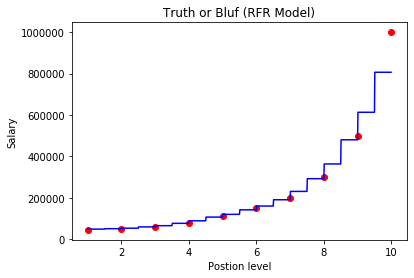

In [13]:
# Random Forest Regression
 
# Importing the dataset_RFR
dataset_RFR = pd.read_csv("Position_Salaries.csv")
X = dataset_RFR.iloc[:,1:2].values
y = dataset_RFR.iloc[:, 2].values

# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(X, y)  

# Predicting the RFR results
y_pred = regressor.predict([[6.5]])

# Visualising the RFR results (For highrt resolution and smoother curve) 
X_grid = np.arange(min(X), max(X), 0.01)   # Sacling the X-axis of the plot from 10 to 5 untis 
X_grid = X_grid.reshape(len(X_grid),1)    # Scaling to make smoother curve   
plt.scatter(X, y, color='red')
plt.plot(X_grid,regressor.predict(X_grid), color='blue')
plt.title("Truth or Bluf (RFR Model)")
plt.xlabel("Postion level")
plt.ylabel("Salary")


